# ML Course 6 - Practice on logistic regression and classification assessment

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Data preparation

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

**Loading the data set from Scikit-Learn**

In [54]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [55]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [56]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [57]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [58]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [59]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [60]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding**

In [61]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


In [62]:
target.head()

,tumor type
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant


## Subject

We have here a large data set that could help to predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of predictors that we will use to train and assess logistic regressions.

* We check at first if the tumor radius is a good predictor for breast cancer.
  * Make data exploration on mean radius, taking into account the target class attributions (examples: density plots or boxplots for each tumor type). Do you think it can make an good predictor?
  * Encode the target and plot it with respect to mean radius.
  * Do a train-test split and train a logistic regression.
  * On your latter plot, add the curve of the probability $P\left( Y=1 \left| X=x \right. \right)$. Here $Y$ is the tumor type and $x$ is the mean radius.
  * According to your model, what is the minimum value for mean radius for considering that the tumor is malignant? Compute prediction of class attribution (tumor type) for several values of mean radius to check your intuition.
  * Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix.
  * Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why? How can we adapt the sensibility of the prediction?
* We decide to add an extra predictor to our model. 
  * Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).
  * Re-train your logistic regression with your two predictors (mean radius and the one you have picked).
  * How have the classification performances increased?
* Bonus questions (optional): 
  * Plot the ROC curves of the two previous models and make the comparison.
  * Compute the LogLoss values of the two previous models and make the comparison.

In [79]:
df1 = pd.concat([features,target], axis=1)

In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [80]:
correlation = df.corr()

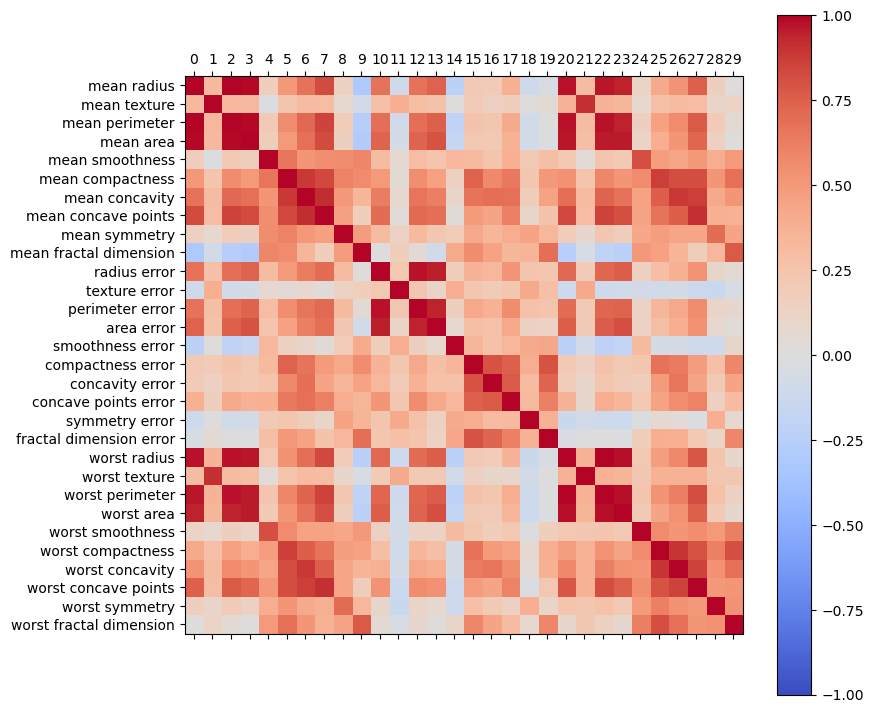

In [81]:
fig = plt.figure(figsize=(9,9), dpi= 100)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlation, cmap = plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlation))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = df.columns
ax.set_yticklabels(names)
plt.show()

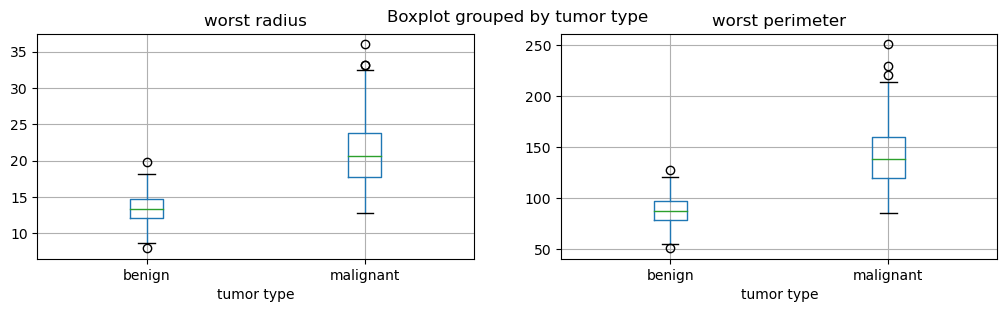

In [88]:
feature_list = ['worst radius', 'worst perimeter']



fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 100)
for i_axs in range(len(feature_list)):
    df1.boxplot(column=feature_list[i_axs], by='tumor type', ax=axs[i_axs])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'sns'

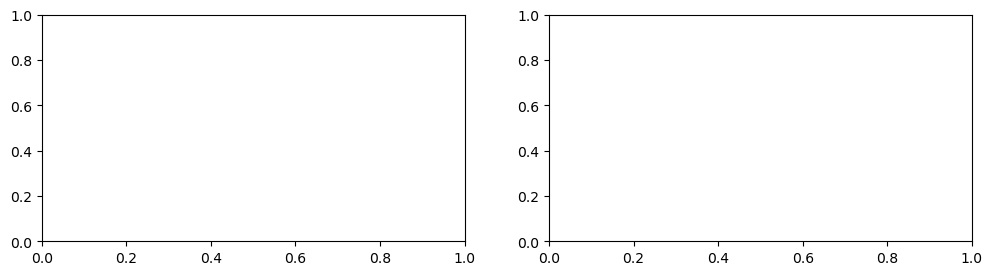

In [94]:
feature_list = ['worst radius', 'worst perimeter']
fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 100)
for i_axs in range(len(feature_list)):
    df1.sns.distplot(column=feature_list[i_axs], by='tumor type', ax=axs[i_axs])
plt.show()

In [22]:
X = df[['mean radius']].values
print(X[:10])

[[17.99]
 [20.57]
 [19.69]
 [11.42]
 [20.29]
 [12.45]
 [18.25]
 [13.71]
 [13.  ]
 [12.46]]


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target['tumor type'])
print(y[:10])

[1 1 1 1 1 1 1 1 1 1]


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 1) (426,)
Test set: (143, 1) (143,)


In [130]:
print(X_train[:10])

[[11.85 ]
 [11.22 ]
 [20.13 ]
 [13.59 ]
 [16.69 ]
 [12.06 ]
 [13.87 ]
 [12.56 ]
 [14.26 ]
 [ 9.029]]


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
X_train[:10]

array([[11.85 ],
       [11.22 ],
       [20.13 ],
       [13.59 ],
       [16.69 ],
       [12.06 ],
       [13.87 ],
       [12.56 ],
       [14.26 ],
       [ 9.029]])

In [132]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
# classifier = LogisticRegression(C=0.01, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression()

In [133]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[30]]))))

['benign']


In [134]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[18]]))))

['benign']


In [135]:
y_proba = classifier.predict_proba(X_test)
y_proba[:10]

array([[0.78917627, 0.21082373],
       [0.81842609, 0.18157391],
       [0.67124605, 0.32875395],
       [0.61755679, 0.38244321],
       [0.84312908, 0.15687092],
       [0.96557432, 0.03442568],
       [0.93337896, 0.06662104],
       [0.95175279, 0.04824721],
       [0.99895658, 0.00104342],
       [0.98774849, 0.01225151]])

In [136]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  6]
 [ 8 45]]


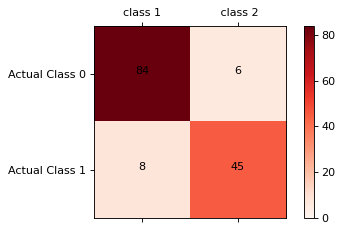

In [150]:
fig = plt.figure(figsize=(5,3), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('class 1', ' class 2'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Class 0', 'Actual Class 1'))


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")

plt.tight_layout()


plt.show()

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred),2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.88
Recall (proportion of true purchases that are correctly predicted) is 0.85


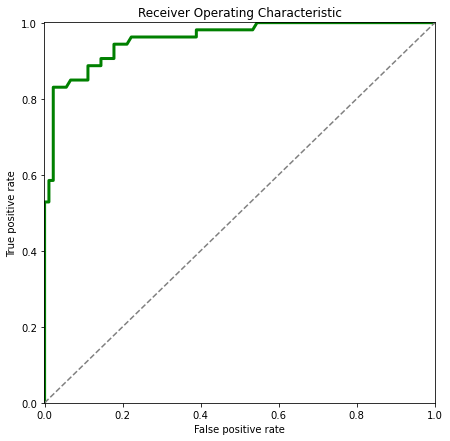

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=3)
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [122]:
print('AUC: ', roc_auc_score(y_test, y_score))

AUC:  0.7273584905660377


In [157]:
X = features['mean texture'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[76, 14],
       [25, 28]], dtype=int64)

In [158]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred),2)))

Accuracy (proportion of correct predictions) is 0.73
Precision (proportion of true purchases among purchase predictions) is 0.67
Recall (proportion of true purchases that are correctly predicted) is 0.53
